<a id='dv'></a>
# data visualization

[libraries](#dt-libraries)  
[parameters](#dt-parameters)  
[directories](#dt-directories)  
[paths](#dt-paths)  
[read](#dt-read)  
[concatenate](#dt-concatenate)  
[reset index](#dt-resetindex)  
[reshape](#dt-reshape)  
[columns](#dt-columns)  
[export](#dt-export)  

## project

In [1]:
project_id = 'gta'

<a id='dt-libraries'></a>
## libraries

[Return to Start of Notebook](#dt)  

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import datetime
import calendar

In [3]:
import warnings # to ignore warnings
from functools import partial # for shorter traceback error messages
from IPython.core.interactiveshell import InteractiveShell # to automtically show cell output

In [4]:
from pandas.api.types import CategoricalDtype

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [6]:
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib import colors


In [7]:
#from data_transformation import read_csv
#from data_transformation import reshape_raw_data

<a id='dt-parameters'></a>
## parameters

[Return to Start of Notebook](#dt)  

In [8]:
# ignore warnings 
warnings.filterwarnings('ignore')

In [9]:
# shorter traceback error messages
get_ipython().showtraceback = partial(get_ipython().showtraceback,exception_only=True)

In [10]:
# shows result of cell without needing print
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

### matplotlib

In [11]:
%matplotlib inline

In [12]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 144
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

### seaborn

In [13]:
sns.set(font_scale=1.5, style="darkgrid")

<a id='dv-variables'></a>
## variables

[Return to Start of Notebook](#dv)  

In [14]:
months = [month for month in calendar.month_abbr if month]

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [15]:
seasons = ['Spring', 'Summer', 'Autumn','Winter']

['Spring', 'Summer', 'Autumn', 'Winter']

<a id='dv-categoricals'></a>
## categoricals

[Return to Start of Notebook](#dv)  

In [16]:
months_cat = CategoricalDtype(months, ordered=True)

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=True)

In [17]:
seasons_cat = CategoricalDtype(seasons, ordered=True)

CategoricalDtype(categories=['Spring', 'Summer', 'Autumn', 'Winter'], ordered=True)

### palettes

In [18]:
seasons_colors = ['orange','green','darkred','blue']
seasons_cmap = ListedColormap(seasons_colors)
print(seasons_cmap)

In [19]:
seaborn_viridis_palette = sns.color_palette("viridis_r",4)
seaborn_viridis_palette;

In [20]:
reds_color_palette = sns.color_palette("Reds",18);

In [21]:
anomaly_color_palette = reds_color_palette[6:];

In [22]:
seasons_palette_dict={}
for i, season in enumerate(seasons):
    seasons_palette_dict[season] = seaborn_viridis_palette[i]
seasons_palette_dict

{'Spring': (0.477504, 0.821444, 0.318195),
 'Summer': (0.134692, 0.658636, 0.517649),
 'Autumn': (0.163625, 0.471133, 0.558148),
 'Winter': (0.253935, 0.265254, 0.529983)}

<a id='dt-directories'></a>
## directories

[Return to Start of Notebook](#dt)  

In [23]:
home_dir = os.path.expanduser("~")
project_dir = os.path.join(home_dir, project_id)
data_dir = os.path.join(project_dir, 'data')
raw_data_dir = os.path.join(data_dir, 'raw-data')
restructured_data_dir = os.path.join(data_dir, 'restructured-data')
aggregated_data_dir = os.path.join(data_dir, 'aggregated-data')

'/Users/rkforest/gta/data/aggregated-data'

In [24]:
os.chdir(project_dir)
os.getcwd()

'/Users/rkforest/gta'

<a id='dt-paths'></a>
## paths

[Return to Start of Notebook](#dt)  

In [25]:
file_paths_r =  sorted(glob.glob(os.path.join(restructured_data_dir, '*.csv')))
[print(path) for path in file_paths_r];

/Users/rkforest/gta/data/restructured-data/global_data_by_month.csv
/Users/rkforest/gta/data/restructured-data/global_data_by_year.csv
/Users/rkforest/gta/data/restructured-data/hemisphere_data_by_month.csv
/Users/rkforest/gta/data/restructured-data/nh_data_by_month.csv
/Users/rkforest/gta/data/restructured-data/sh_data_by_month.csv
/Users/rkforest/gta/data/restructured-data/zonal_data_by_year.csv


In [26]:
file_paths_a =  sorted(glob.glob(os.path.join(aggregated_data_dir, '*.csv')))
[print(path) for path in file_paths_a];

/Users/rkforest/gta/data/aggregated-data/global_by_decade.csv
/Users/rkforest/gta/data/aggregated-data/global_by_month.csv
/Users/rkforest/gta/data/aggregated-data/global_by_season.csv
/Users/rkforest/gta/data/aggregated-data/global_by_year.csv


In [27]:
file_paths_nc  =  sorted(glob.glob(os.path.join(raw_data_dir, '*.nc')))
[print(path) for path in file_paths_nc];

/Users/rkforest/gta/data/raw-data/gistemp1200_GHCNv4_ERSSTv5.nc


<a id='dv-read'></a>
## read

[Return to Start of Notebook](#dv)  

### restructured data

In [28]:
df_global_by_month = pd.read_csv(file_paths_r[0],
                                 parse_dates=['date'],  
                                 index_col='date') 
df_global_by_month.head(1)

,year,month,season,area,anomaly
date,,,,,
1880-01-01,1880,Jan,Winter,GLB,-0.18


In [29]:
df_global_by_year = pd.read_csv(file_paths_r[1], index_col='year') 
df_global_by_year.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1880,-0.18,-0.24,-0.09,-0.16,-0.1,-0.21,-0.18,-0.1,-0.15,-0.23,-0.22,-0.17


In [30]:
df_global_by_hemisphere = pd.read_csv(file_paths_r[2], 
                                 parse_dates=['date']) 
df_global_by_hemisphere.head(1)

,date,season,month,area,anomaly
0,1880-01-01,Winter,Jan,NH,-0.36


### aggregated data

In [31]:
df_global_grouped_by_decade = pd.read_csv(file_paths_a[0], 
                                  parse_dates=['date'],
                                  index_col='date') 
df_global_grouped_by_decade.head(1)

,avg_anomaly,max_anomaly,min_anomaly,count_anomaly
date,,,,
1880-01-01,-0.21,0.16,-0.72,120


In [32]:
df_global_grouped_by_year = pd.read_csv(file_paths_a[3], 
                                  parse_dates=['date'],
                                  index_col='date') 
df_global_grouped_by_year.head(1)

,avg_anomaly,max_anomaly,min_anomaly,count_anomaly
date,,,,
1880-01-01,-0.17,-0.09,-0.24,12


In [33]:
df_global_grouped_by_season = pd.read_csv(file_paths_a[2]) 
df_global_grouped_by_season.head(1)

,season,avg_anomaly,max_anomaly,min_anomaly,cnt_anomaly
0,Spring,0.064791,1.36,-0.63,430


In [34]:
df_global_grouped_by_month = pd.read_csv(file_paths_a[1]) 
df_global_grouped_by_month.head(1)

,month,avg_anomaly,max_anomaly,min_anomaly,cnt_anomaly
0,Jan,0.064236,1.17,-0.81,144


<a id='dv-transform'></a>
## transform

[Return to Start of Notebook](#dv)  

In [35]:
df_global_by_month['season'] = df_global_by_month['season'].astype(seasons_cat)
df_global_by_month.dtypes

year          int64
month        object
season     category
area         object
anomaly     float64
dtype: object

In [36]:
df_global_grouped_by_season['season'] =\
    df_global_grouped_by_season['season'].astype(seasons_cat)
df_global_grouped_by_season.set_index('season',inplace=True)
df_global_grouped_by_season.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 4 entries, Spring to Winter
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avg_anomaly  4 non-null      float64
 1   max_anomaly  4 non-null      float64
 2   min_anomaly  4 non-null      float64
 3   cnt_anomaly  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 336.0 bytes


In [37]:
df_global_grouped_by_month['month'] =\
    df_global_grouped_by_month['month'].astype(months_cat)
df_global_grouped_by_month.set_index('month',inplace=True)
df_global_grouped_by_month.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 12 entries, Jan to Dec
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avg_anomaly  12 non-null     float64
 1   max_anomaly  12 non-null     float64
 2   min_anomaly  12 non-null     float64
 3   cnt_anomaly  12 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 792.0 bytes


<a id='dv-visualize'></a>
## visualize

[Return to Start of Notebook](#dv)  

### all values

#### scatter plot

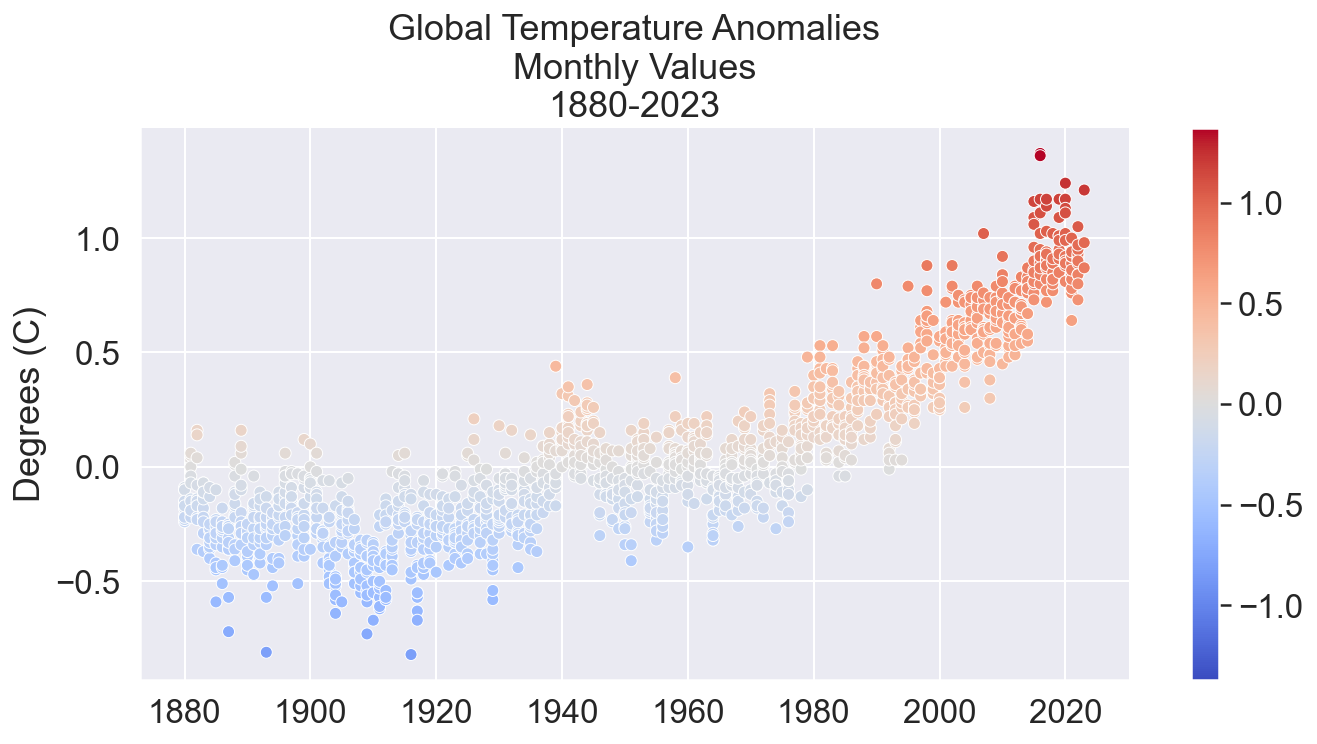

In [38]:
divnorm = colors.TwoSlopeNorm(vmin=df_global_by_month['anomaly'].max()*-1,
                              vcenter=0.,
                              vmax=df_global_by_month['anomaly'].max())
g = sns.relplot(
    kind="scatter", 
    height=5,
    aspect=2,
    data=df_global_by_month, 
    x='year',
    y='anomaly',
    hue='anomaly',
    legend=False, 
    palette="coolwarm",
    hue_norm=divnorm)
g.set(title="Global Temperature Anomalies\nMonthly Values\n1880-2023",
      xlabel="",
      ylabel="Degrees (C)")

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=divnorm)
for ax in g.axes.flat:
    ax.figure.colorbar(sm)

#### histogram

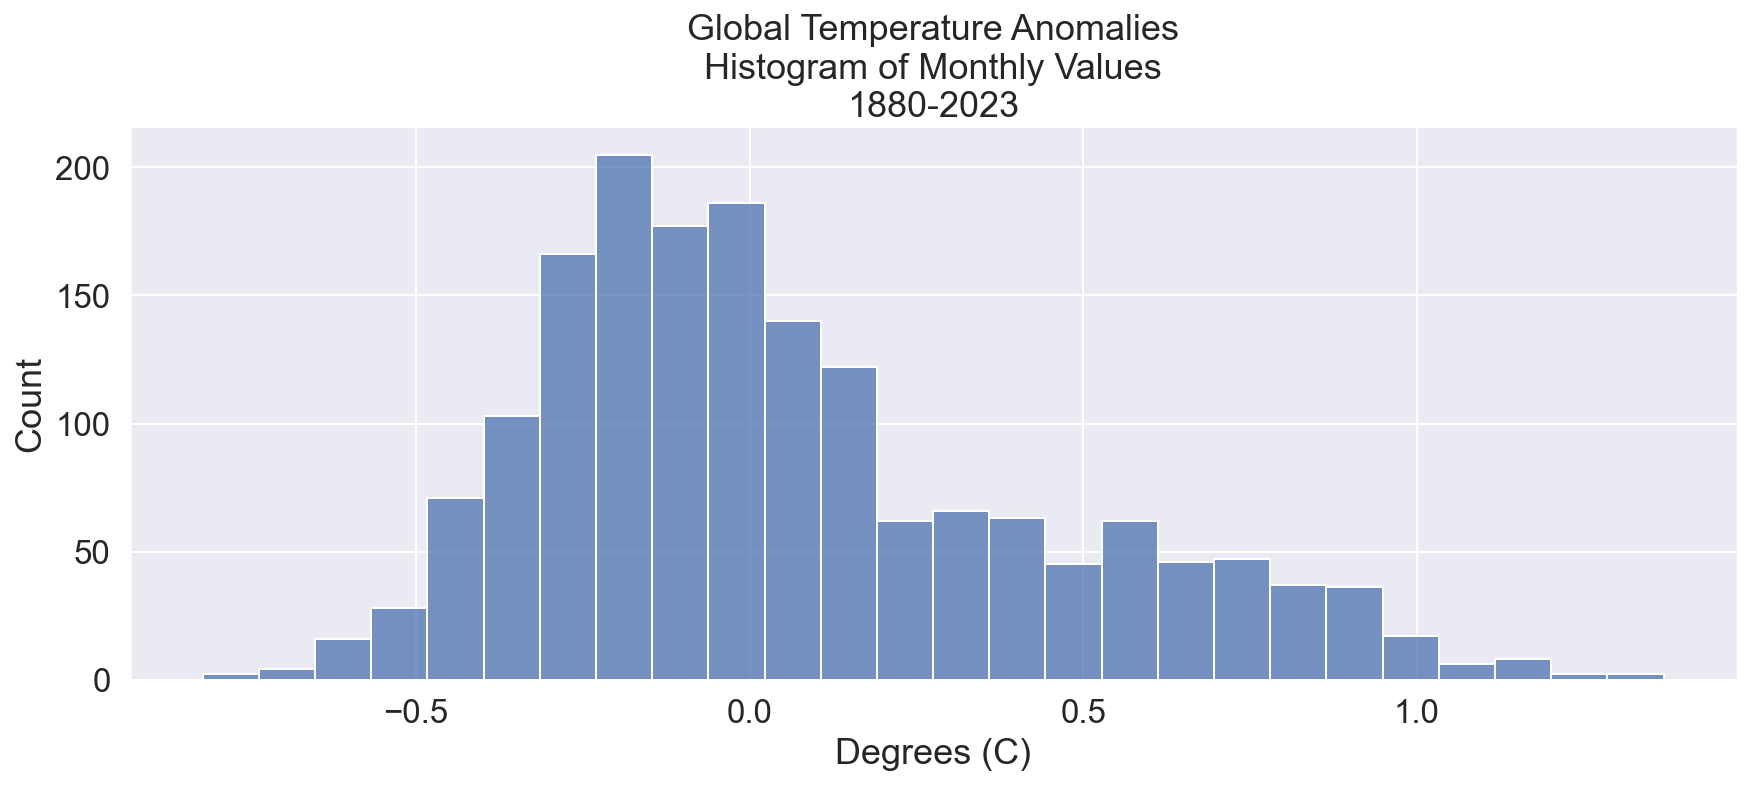

In [39]:
g = sns.displot(
    kind="hist",
    height=5,
    aspect=2.5,
    data=df_global_by_month,
    x='anomaly')
g.set(title="Global Temperature Anomalies\nHistogram of Monthly Values\n1880-2023", 
      xlabel="Degrees (C)")  

plt.show()

### by year and decade

#### scatter plot

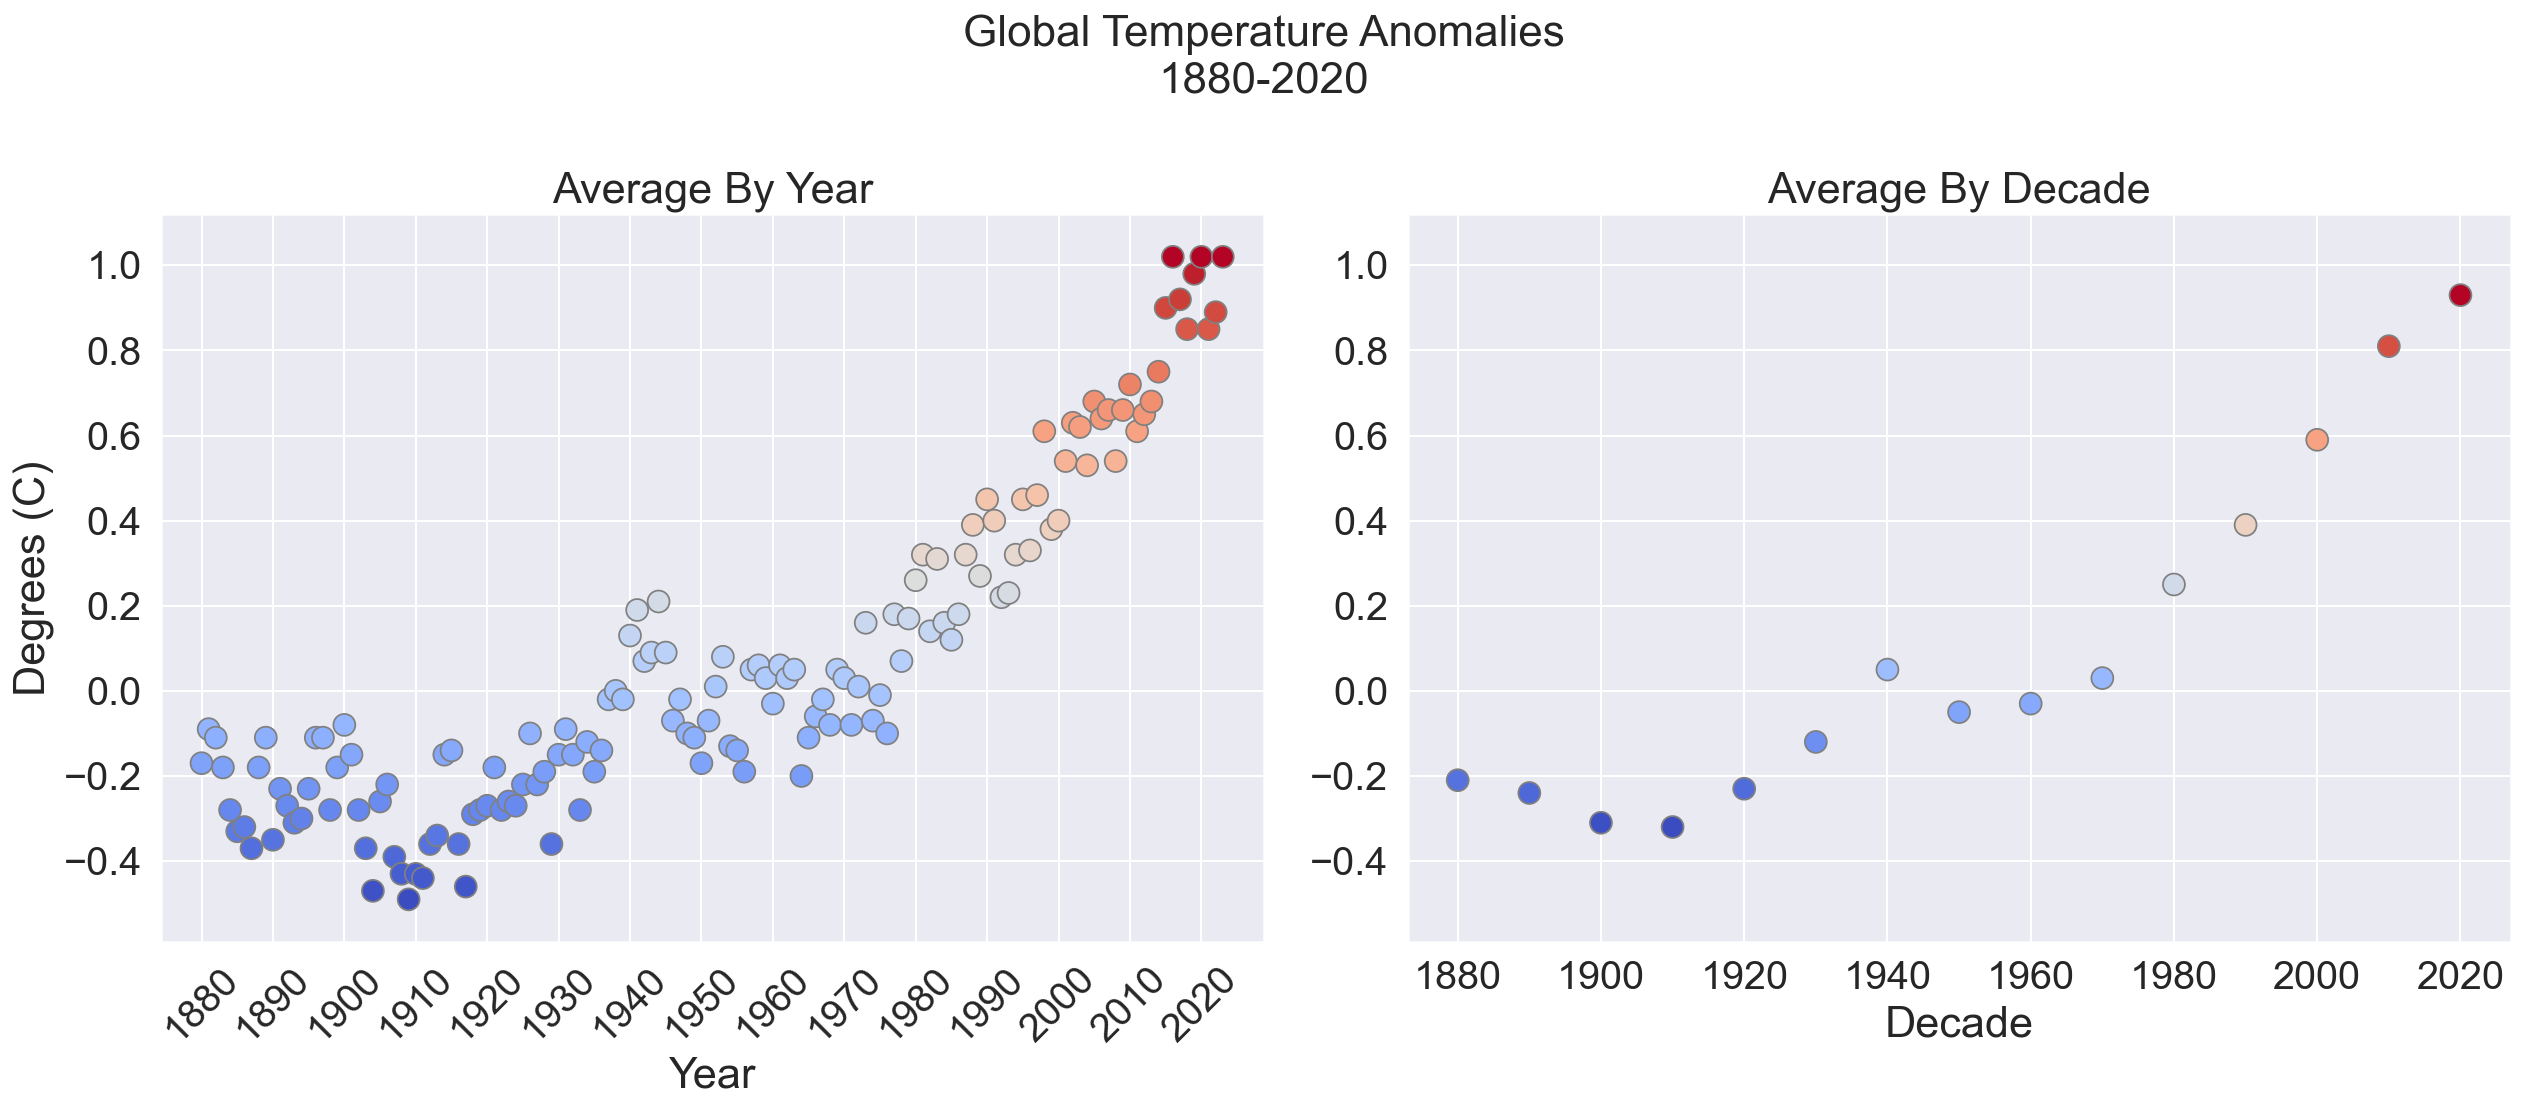

In [40]:
sns.set(font_scale=1.8, style="darkgrid")
f, (ax1, ax2) = plt.subplots(1,2,figsize=(18, 8))

dtf = mdates.DateFormatter("%Y")

y_axis_max = df_global_grouped_by_year["avg_anomaly"].max() + 0.1
y_axis_min = df_global_grouped_by_year["avg_anomaly"].min() - .1

sns.scatterplot(x=df_global_grouped_by_year.index.values,
                y=df_global_grouped_by_year["avg_anomaly"],
                hue=df_global_grouped_by_year["avg_anomaly"],
                legend=False,
                palette="coolwarm",
                edgecolor='grey',
                s=120,
                ax=ax1)
ax1.set(title="Average By Year",
        xlabel="Year",
        ylabel="Degrees (C)")

ax1.xaxis.set_major_locator(mdates.YearLocator(10))
ax1.xaxis.set_major_formatter(dtf)
ax1.set(ylim=[y_axis_min,y_axis_max])
ax1.margins(0.04)

sns.scatterplot(x=df_global_grouped_by_decade.index.values,
                y=df_global_grouped_by_decade["avg_anomaly"],
                hue=df_global_grouped_by_decade["avg_anomaly"],
                legend=False,
                palette="coolwarm",
                edgecolor='grey',
                marker='o',
                s=120,
                ax=ax2)
ax2.set(title="Average By Decade",
       xlabel="Decade",
       ylabel="")
ax2.xaxis.set_major_locator(mdates.YearLocator(20))
ax2.xaxis.set_major_formatter(dtf)
ax2.set(ylim=[y_axis_min,y_axis_max])
ax2.margins(0.05)

plt.setp(ax1.get_xticklabels(), rotation = 45)
plt.suptitle("Global Temperature Anomalies\n1880-2020",fontsize=22)
plt.tight_layout()

#plt.savefig(os.path.join(ea_output_dir, "Global-Temperature-Anomalies-1880-2020.png"))  
plt.show()

### by hemisphere

#### boxplot

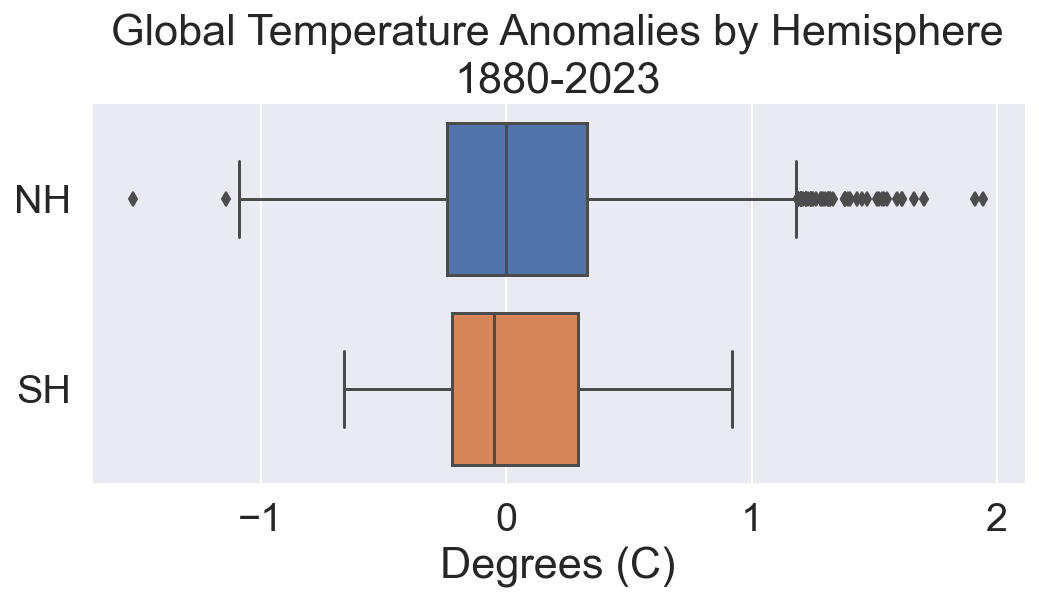

In [41]:
sns.set_style('darkgrid')

g = sns.catplot(
    kind="box", 
    height=4, 
    aspect=2,
    data=df_global_by_hemisphere,
    y='area',
    x='anomaly',
    saturation=0.9,
    )
g.set(title="Global Temperature Anomalies by Hemisphere\n1880-2023",
      ylabel="", 
      xlabel="Degrees (C)")  

plt.show()

#### layered histogram

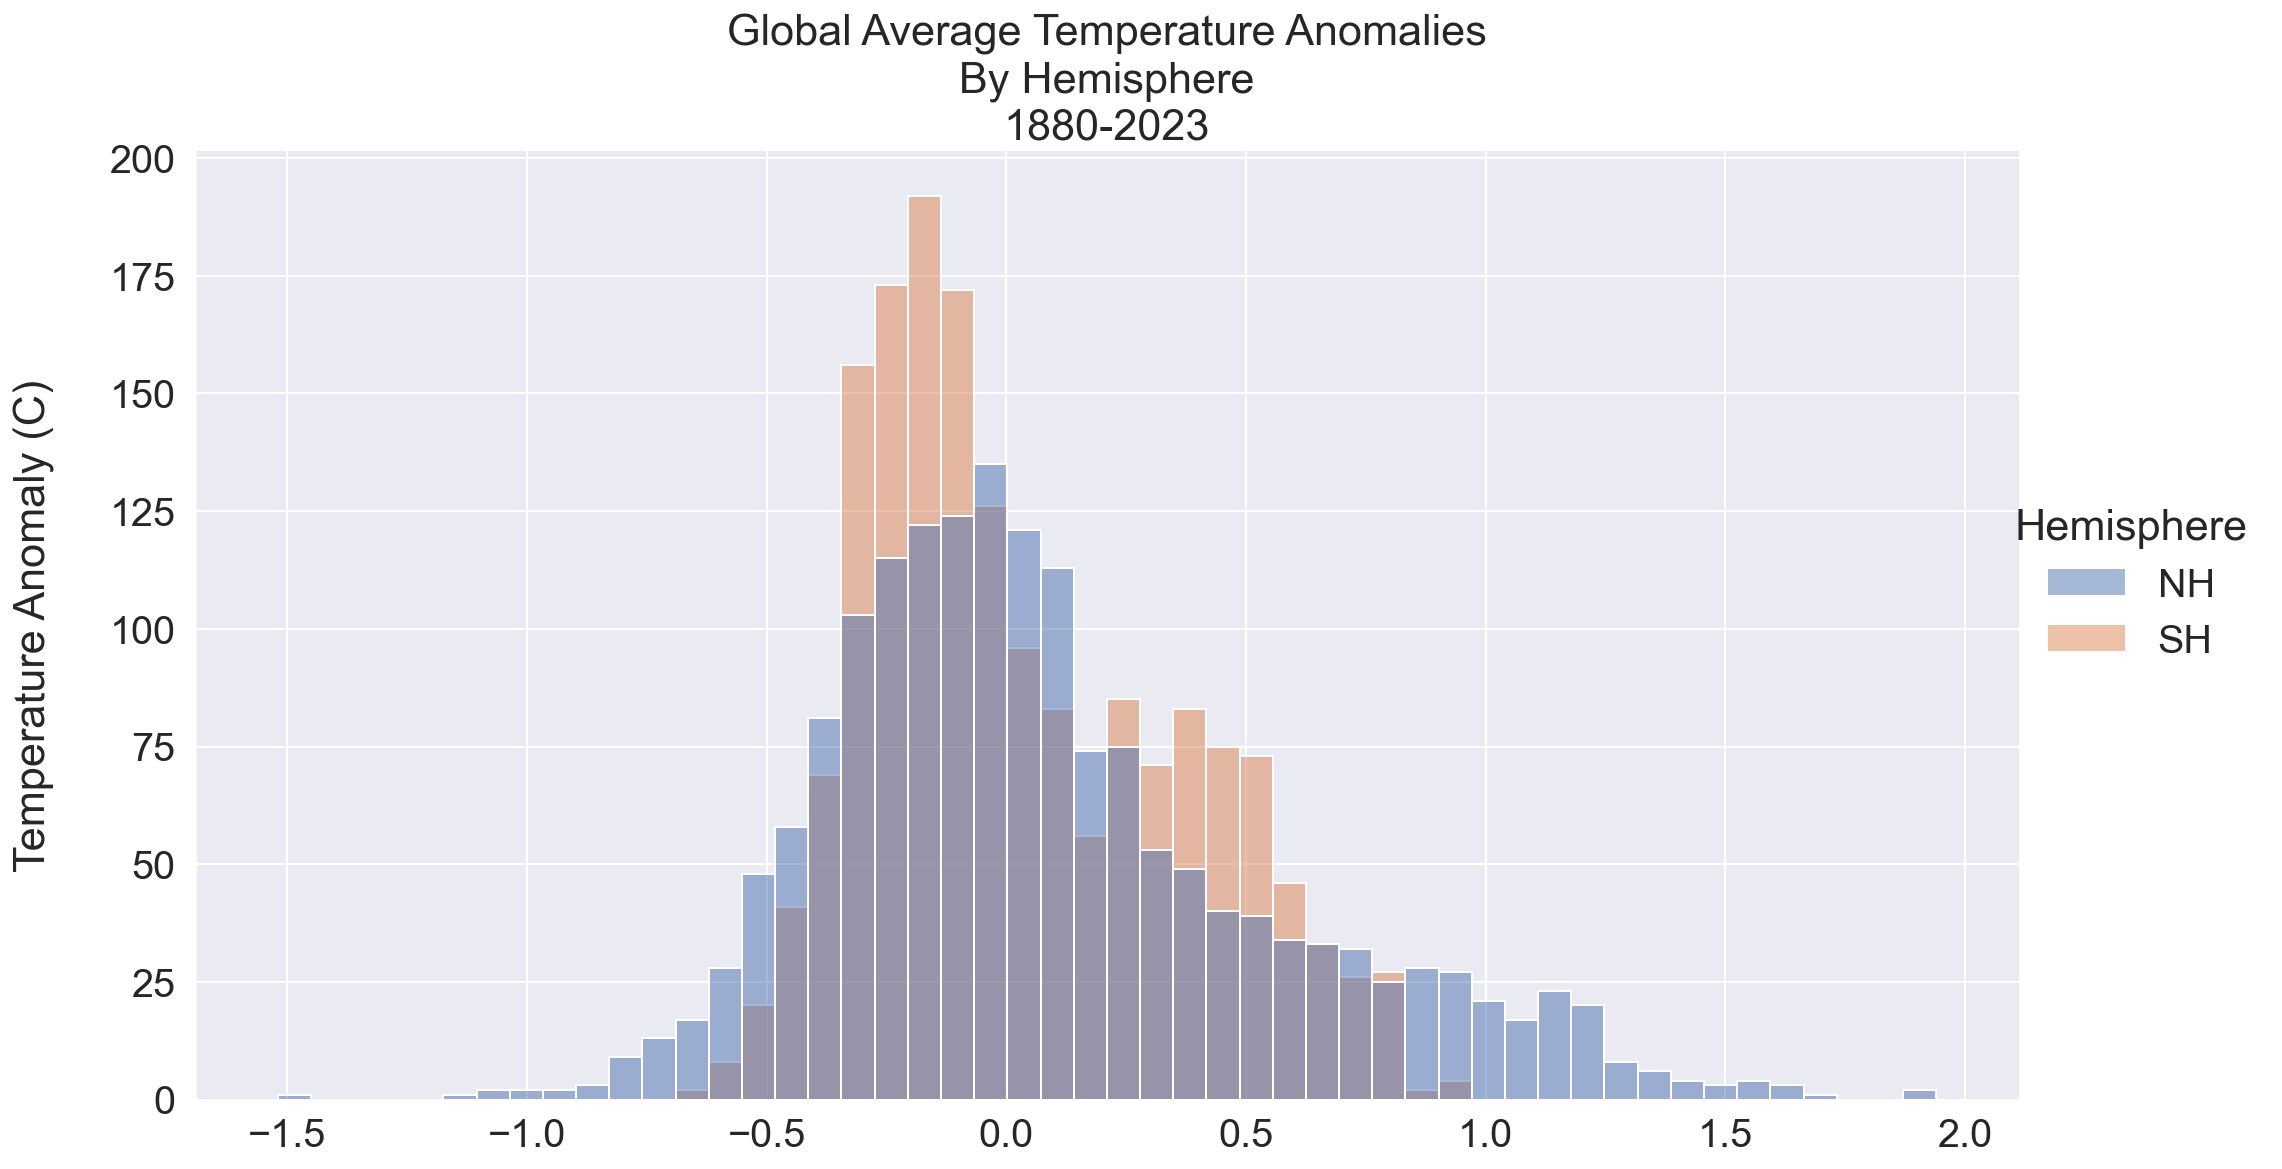

In [42]:
sns.set(style="darkgrid")
with sns.plotting_context("notebook", font_scale=1.8):

    g = sns.displot(
        data=df_global_by_hemisphere,
        x="anomaly",
        hue="area",
        alpha=0.5, 
        height=8, 
        aspect=1.8)
    
    g.set(title = "Global Average Temperature Anomalies\nBy Hemisphere\n1880-2023",
          xlabel = None,
          ylabel = "Temperature Anomaly (C)\n")
    
    legend_title = 'Hemisphere'
    g._legend.set_title(legend_title)


plt.show()

### by month

#### bar plot

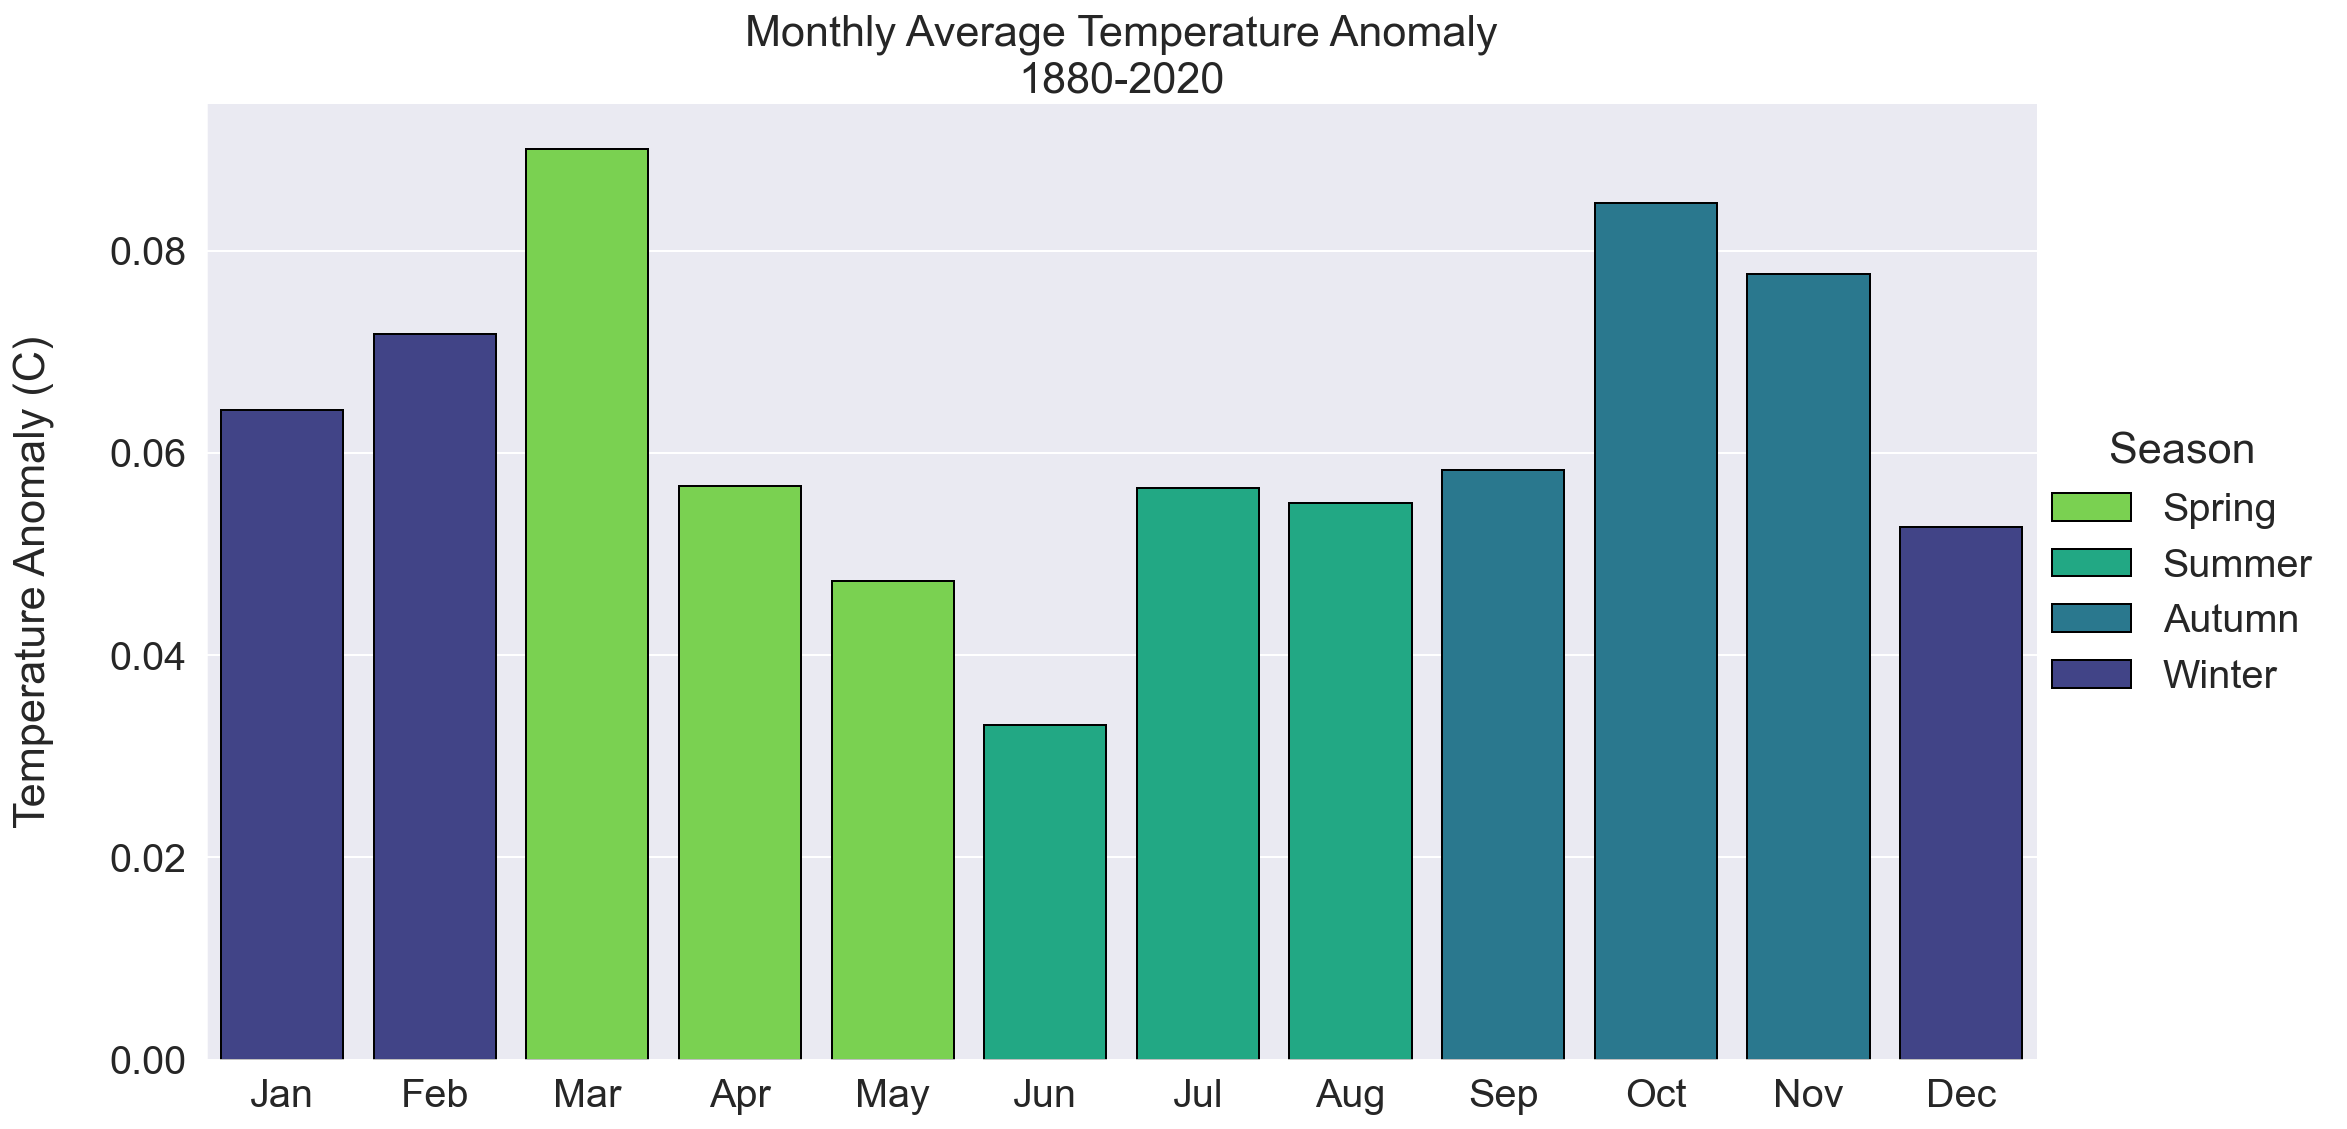

In [43]:
sns.set(style="darkgrid")
with sns.plotting_context("notebook", font_scale=1.8):

#        kind="bar", saturation=1.0, alpha=1.0, ci=None, edgecolor='black', dodge=False,
#        kind="box", saturation=1.0, dodge=False,
#        kind="strip", s=5, alpha=1.0, jitter=True, 
#        kind="swarm", s=5, alpha=1.0,    

    g = sns.catplot(
        kind="bar", saturation=1.0, alpha=1.0, ci=None, edgecolor='black', dodge=False,
        data=df_global_by_month,
        x="month",
        y="anomaly",
        palette=seasons_palette_dict,
        height=8,
        aspect=1.8,
        hue="season",
       )

    g.set(title = "Monthly Average Temperature Anomaly\n1880-2020",
          xlabel = None,
          ylabel = "Temperature Anomaly (C)\n")
    
    legend_title = 'Season'
    g._legend.set_title(legend_title)

plt.show()


### by season

####  faceted line plot

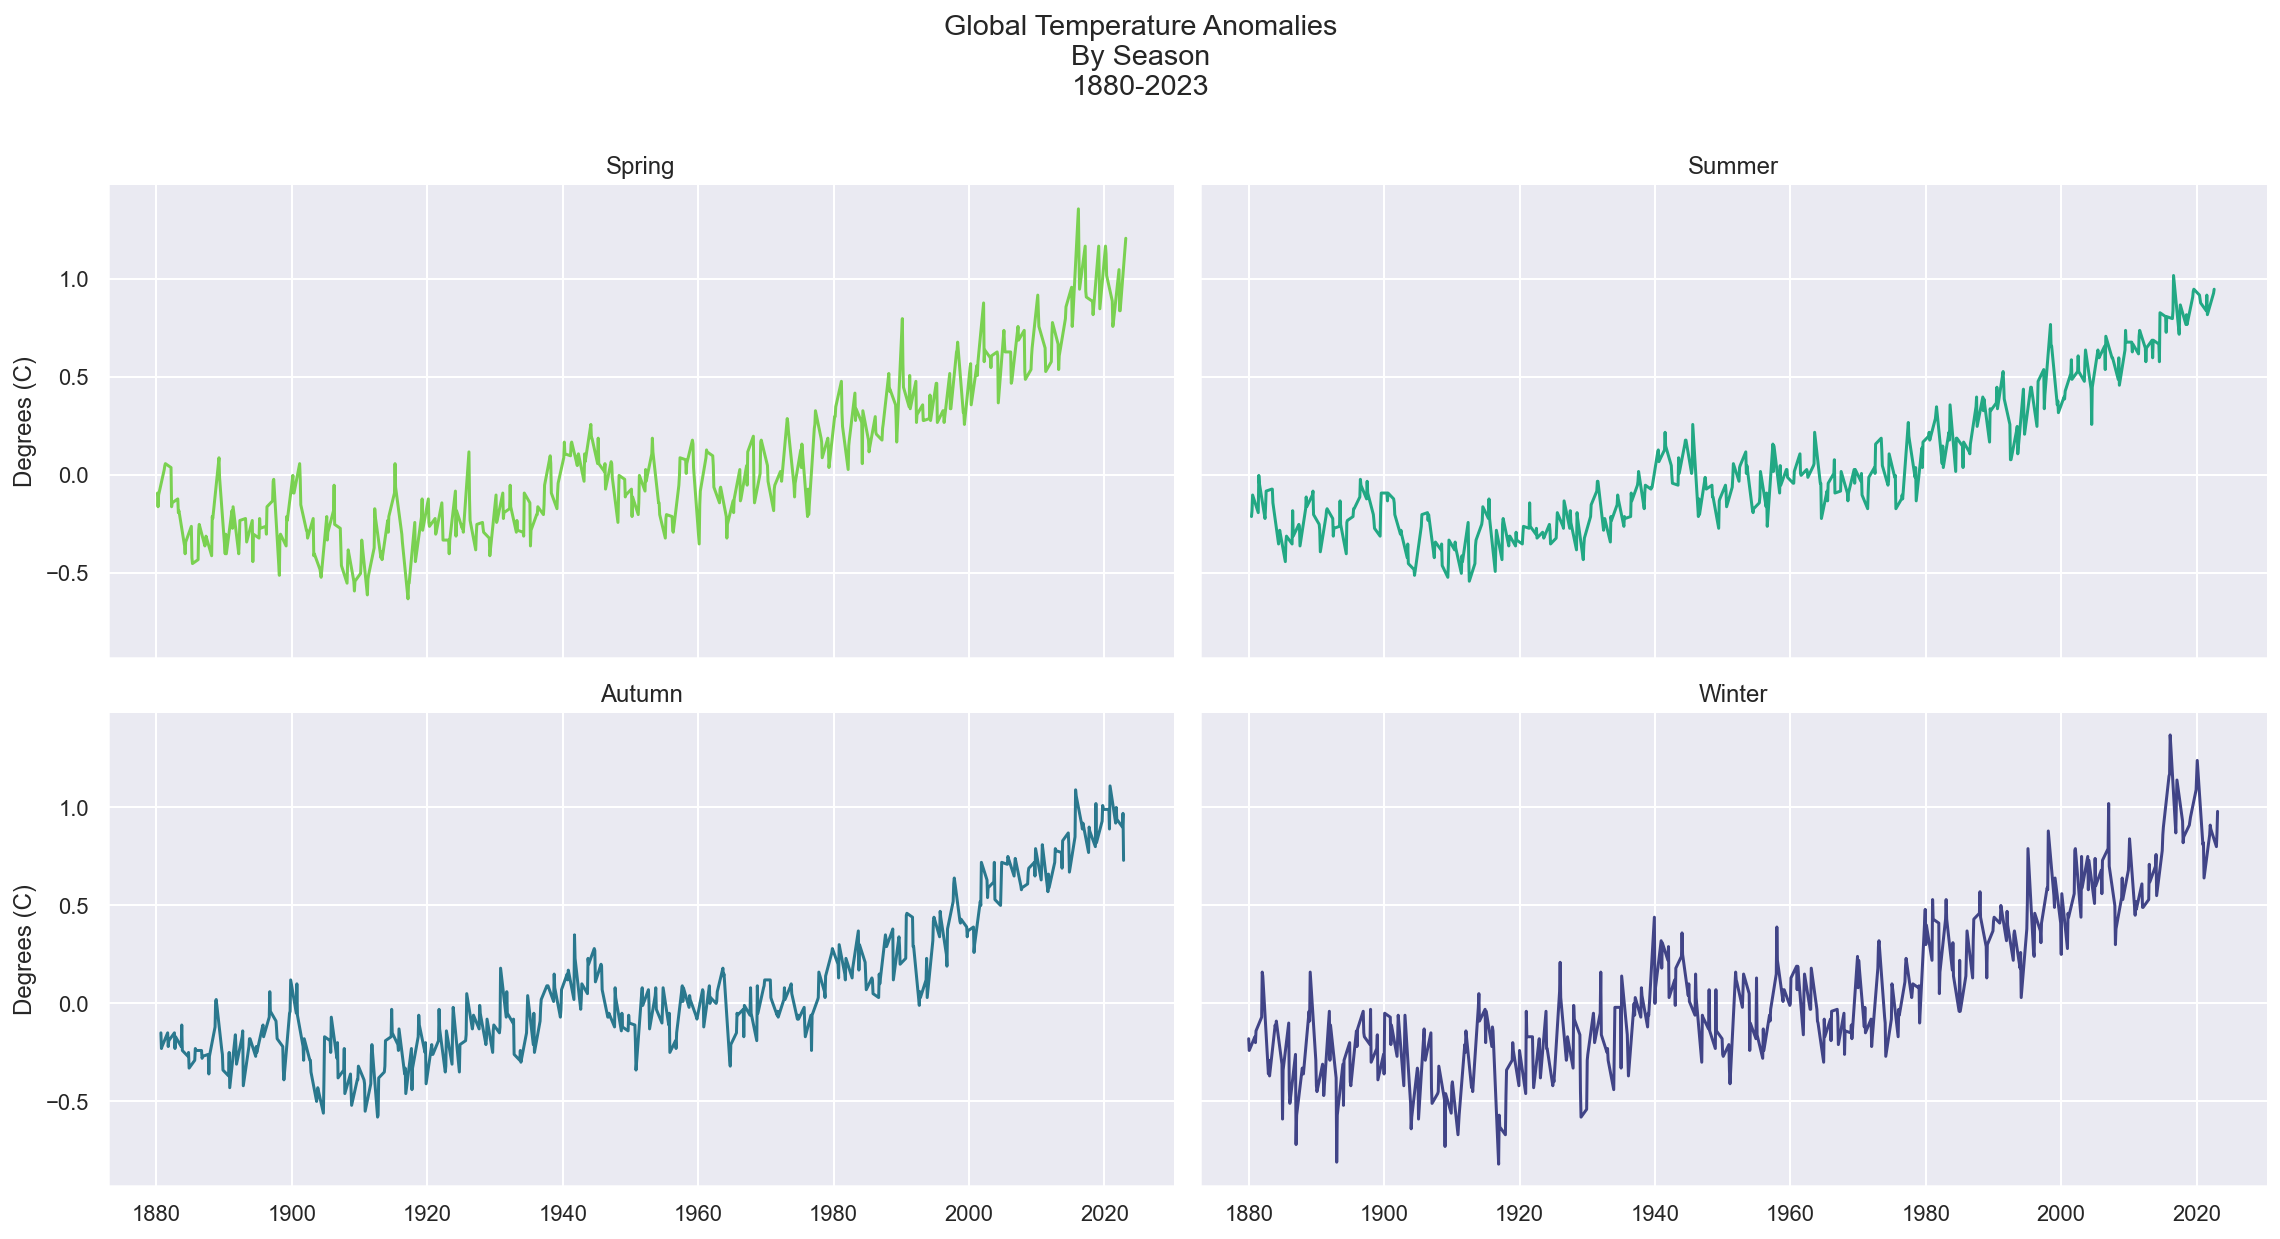

In [44]:
g = sns.relplot(
    kind="line",
    height=4,
    aspect=2,
    data=df_global_by_month,
    x='date',
    y='anomaly',
    hue='season',
    hue_order=seasons,
    palette=seaborn_viridis_palette,
    col='season',
    col_wrap=2,
    legend=False)
g.set(xlabel='', ylabel = "Degrees (C)");
g.fig.suptitle("Global Temperature Anomalies\nBy Season\n1880-2023\n", y=1.1);
for col_key, ax in g.axes_dict.items():
    ax.set_title(col_key)
    
plt.show()